In [1]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier



In [3]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data['EmployeeNumber'].nunique()

1470

In [7]:
data['EmployeeNumber'].is_unique

True

Here , there is Employee Numbers is unique so we say there is no dulipcate 

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
attrition_count=data["Attrition"].value_counts()
attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

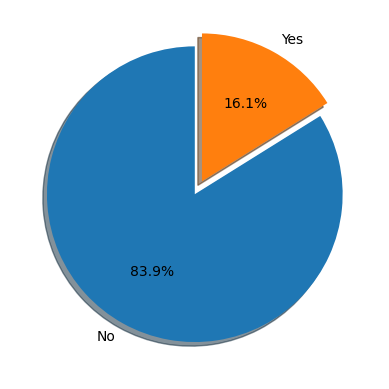

In [10]:
labels = ["No","Yes"]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(data.Attrition.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [11]:
Age_wise_attrition=pd.crosstab(data.Age,columns = data.Attrition)
Age_wise_attrition

Attrition,No,Yes
Age,,
18,4,4
19,3,6
20,5,6
21,7,6
22,11,5
23,10,4
24,19,7
25,20,6
26,27,12


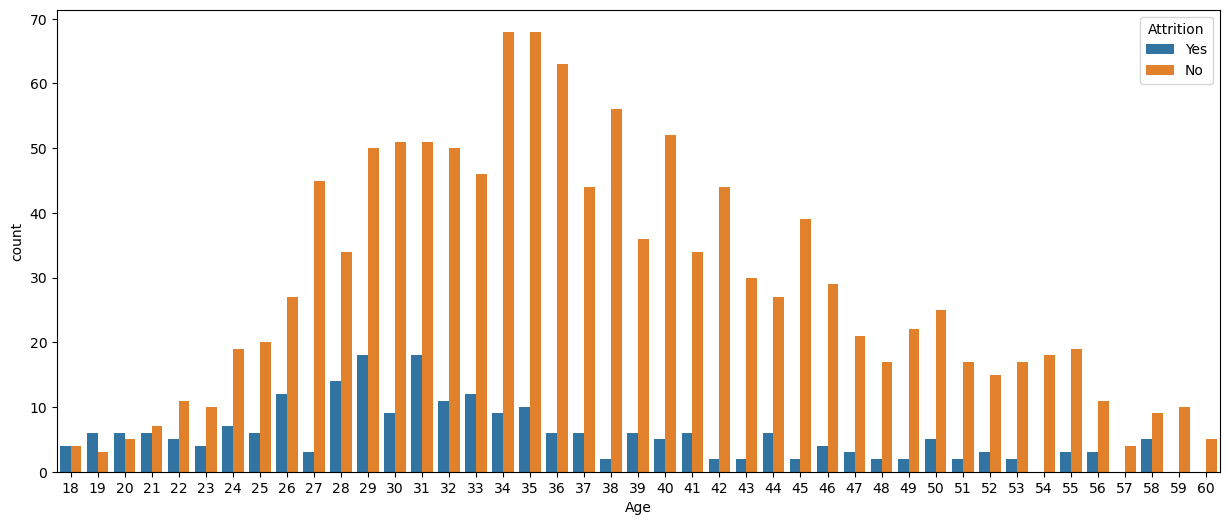

In [12]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
plt.subplots (figsize=(15,6))
sns.countplot (x='Age',  hue='Attrition', data= data)
plt.show()

In [13]:
data['Department'].nunique()

3

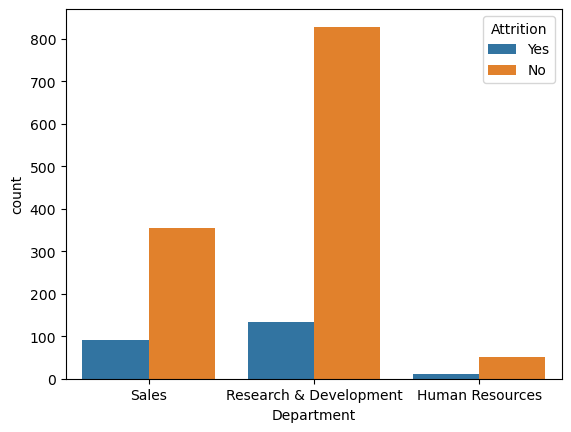

In [14]:
sns.countplot (x='Department', hue='Attrition', data= data)
plt.show()

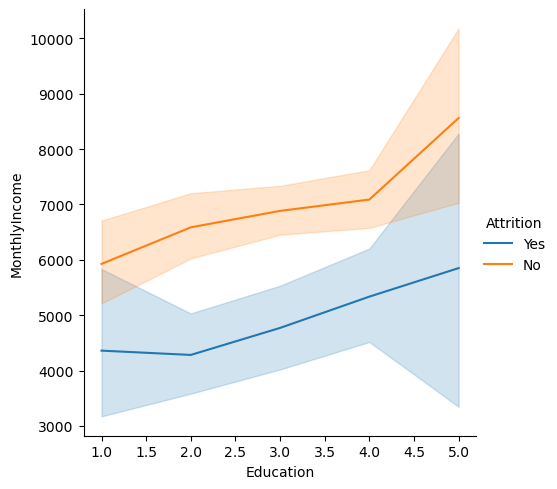

In [15]:
sns.relplot(x="Education",y="MonthlyIncome",hue="Attrition",kind="line",data=data)
plt.show()

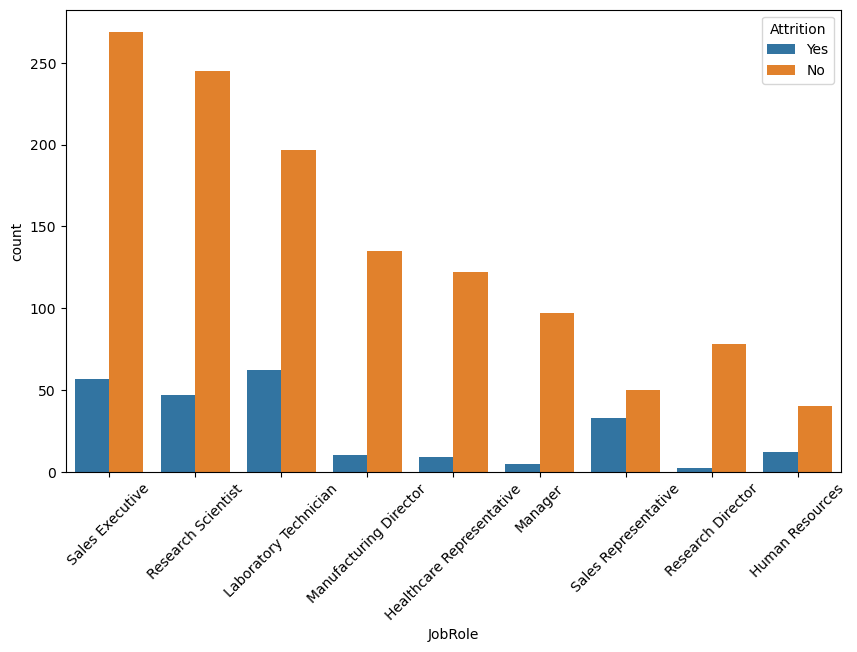

In [16]:
plt.subplots (figsize=(10,6))
sns.countplot (x='JobRole', hue='Attrition', data= data)
plt.xticks(rotation=45)
plt.show()

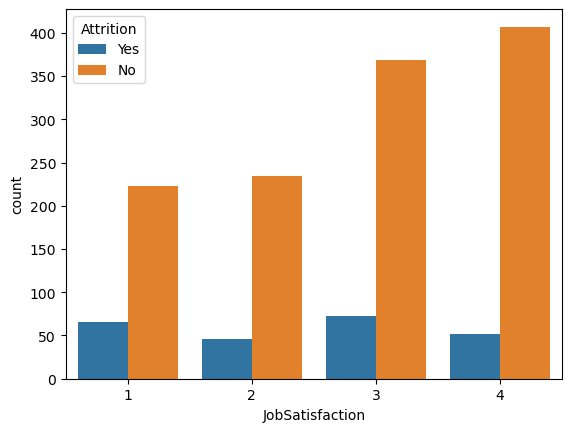

In [17]:
sns.countplot (x='JobSatisfaction', hue='Attrition', data= data)
plt.show()

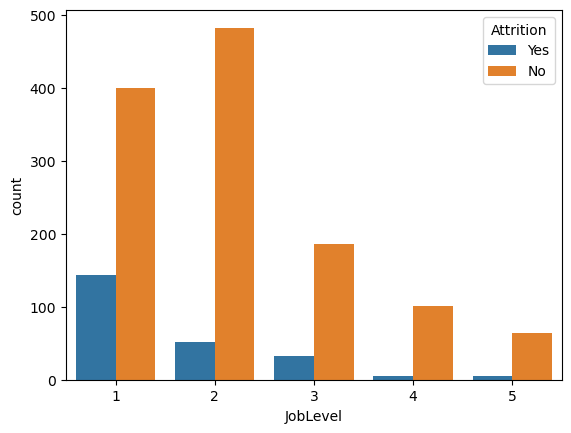

In [18]:
sns.countplot (x='JobLevel', hue='Attrition', data= data)
plt.show()

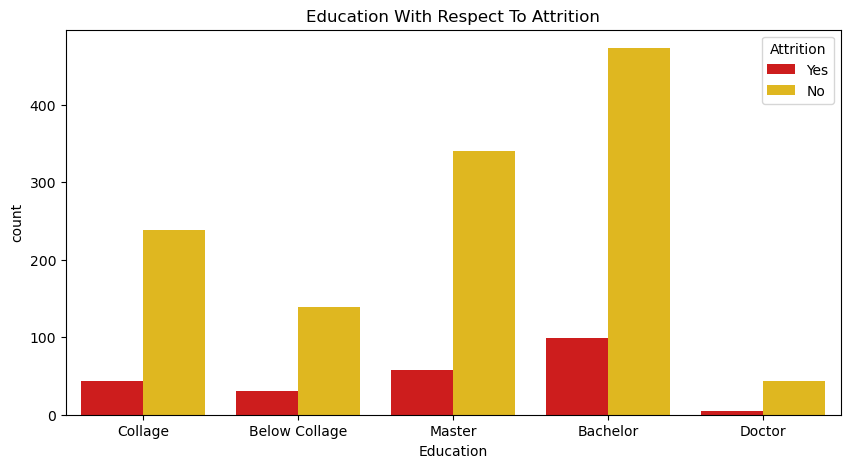

In [19]:
edu_map = {1: 'Below Collage', 2: 'Collage', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
plt.figure(figsize=(10, 5))
sns.countplot(x=data['Education'].map(edu_map), hue='Attrition', data=data, palette='hot')
plt.title("Education With Respect To Attrition")
plt.show()

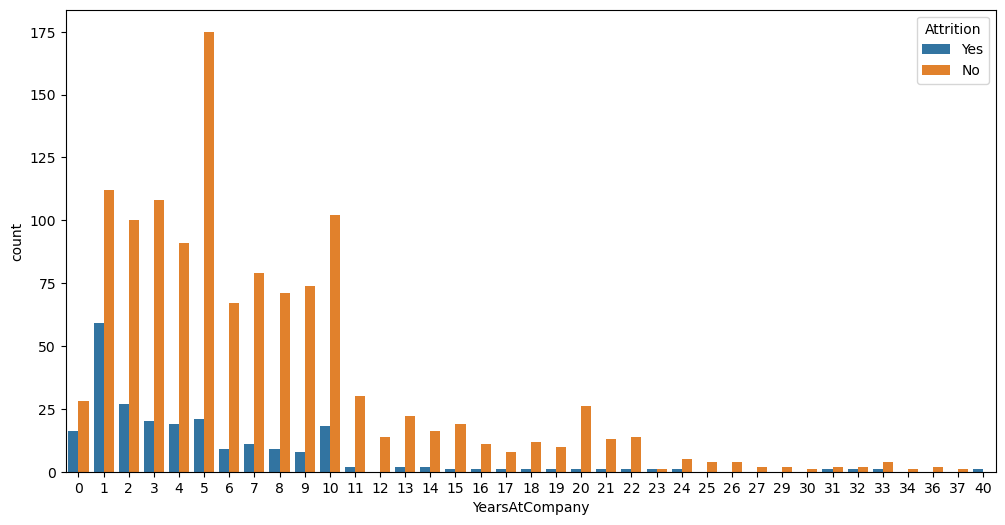

In [20]:
plt.subplots (figsize=(12,6))
sns.countplot (x='YearsAtCompany', hue='Attrition', data= data)
plt.show()

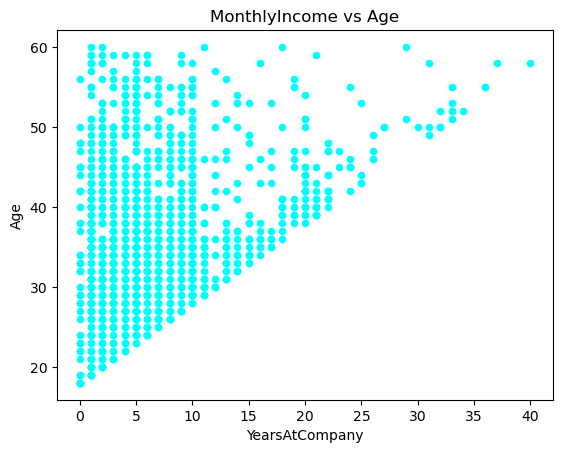

In [21]:
data.plot.scatter(x = 'YearsAtCompany', y = 'Age',
                  color = 'cyan', title = 'MonthlyIncome vs Age')
plt.show()


### sns.relplot(x="EnvironmentSatisfaction",y="MonthlyIncome",hue="Attrition",kind="line",data=data)
plt.show()

In [22]:
data2=pd.read_csv("HR-Employee-Attrition .csv")
data2.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,2,2,0,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,0,8,1,3,1,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,2,4,1,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,3,4,4,0,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


In [23]:
data2 = pd.get_dummies(data2, columns=['StandardHours'], drop_first=True)
data2

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,2,2,0,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,8,1,3,1,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,2,4,1,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,3,4,4,0,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,3,1,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,6,1,4,1,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,4,3,2,1,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,3,4,1,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


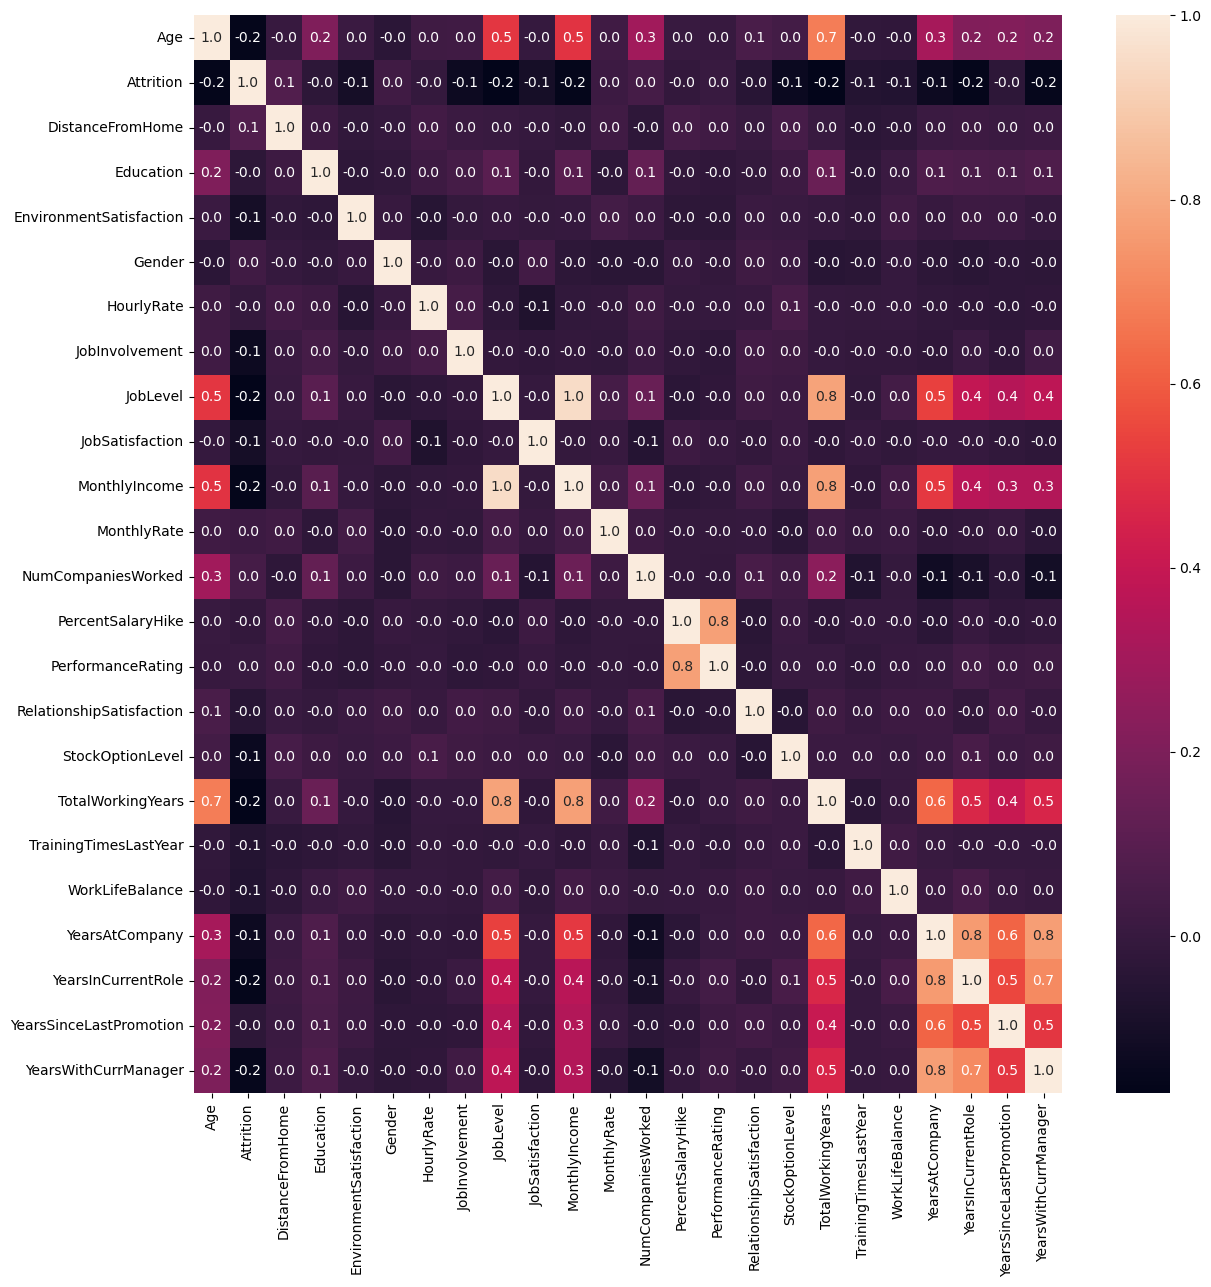

In [24]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(data2.corr(), annot = True, fmt = ".1f", ax=ax)
plt.show()

## Random Forest

In [25]:
X = data2.drop('Attrition', axis=1)
y = data2['Attrition']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Training & Testing

In [29]:
print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Target:", y_test.shape)

Training set shape - Features: (1176, 23) Target: (1176,)
Testing set shape - Features: (294, 23) Target: (294,)


## K-Nearest Neighbors (KNN)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)


In [39]:
knn.fit(X_train_contiguous, y_train)


KNeighborsClassifier()

In [40]:
y_pred = knn.predict(X_test_contiguous)


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435374149659864
